1--Task 1. Plot $hh$ versus $xx$ as a solid line with crosses added at each grid point (to visualize the goodness of the discretization) or with `plt.hist` function combined with `plt.plot`. _Make sure the axis pixels are properly located either to the center or half grid shifted_

/opt/miniconda3/envs/ast5110_course/bin/python


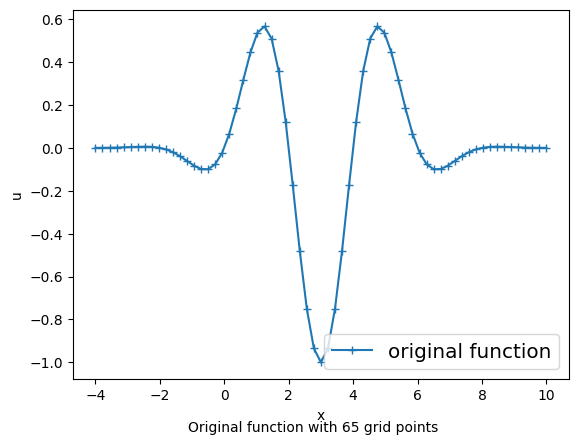

In [1]:
import sys 
print(sys.executable)
import os   
sys.path.append(os.getcwd()+'/..')
import numpy as np
import math
import matplotlib.pyplot as plt 
import nm_lib as nm
from typing import Type

# --- Values reused in other tasks of ex_1 ---
x0 = -4.0  
xf = 10.0 
pi = math.pi
# ---------------------------

def tfunc(xx):
    return math.cos(pi * (xx - 1.0) / 2.0) * math.exp(-(xx - 3.0) / 2.5 * (xx - 3.0) / 2.5)

def discretisation(x0, xf, nump, dt_float: Type[float]):
    nint = nump - 1
    dh = dt_float((xf - x0) / nint)
    xx = dt_float(np.arange(nump) * dh + x0)
    xx_half = dt_float(np.arange(nump) * dh + x0 + dh * 0.5)
    return nint, dh, xx, xx_half 
     
nump = 65
nint, dh, xx, xx_half = discretisation(x0, xf, nump, dt_float=np.float64)

hh = np.zeros(nump)
for i in range(0, nump):
    hh[i] = tfunc(xx[i])

plt.plot(xx, hh, '-+', label='original function')
plt.xlabel("x")
plt.ylabel("u")
plt.legend(loc='lower right', shadow=False, fontsize='x-large')
plt.figtext(0.5, 0.0, "Original function with 65 grid points", horizontalalignment='center')
plt.show()

1--Task 2. Plot the array containing the numerical derivative, $hp$. Calculate analytically the derivative of the function (1) and represent it in the same figure to ascertain the goodness of the approximation for that number of points. __hint__ _make sure the axis pixels are properly located either to the center or half grid shifted_. 

To compare the numerical approximation with the exact solution, first provide the exact derivative of function Eq.(1) in [ex_1](https://github.com/AST-Course/AST5110/blob/main/notebooks/ex_1.ipynb) below

$$h'(x) = -\frac{\pi}{2}\sin\left[\frac{\pi (x-1)}{2}\right] \exp\left[-\left(\frac{x-3}{2.5}\right)^2\right]-\frac{4}{5}\cos\left[\frac{\pi (x-1)}{2}\right]\exp\left[-\left(\frac{x-3}{2.5}\right)^2\right]\left(\frac{x-3}{2.5}\right).$$

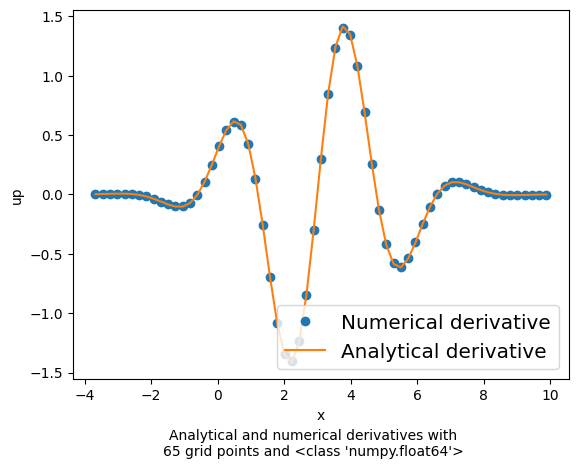

When having 65 grid points:
the L-infinity norm of the error is  0.009941569011108875
the L-2 norm of the error is  0.00047432465147495485


In [2]:
def analyt_deriv_tfunc(xx, dt_float: Type[float]): # The analytical derivative of function Eq.(1) in ex_1
    C_1 = dt_float(pi * (xx - 1.0) / 2.0)
    C_2 = dt_float((xx - 3.0) / 2.5)
    return - pi / 2.0 * math.sin(C_1) * math.exp(- C_2 * C_2) - 0.8 * math.cos(C_1) * math.exp(- C_2 * C_2) * C_2
        
def deriv_err_tfunc(num_deriv_func, nump, xx, xx_half, if_plot, dt_float: Type[float]):
    hh = np.zeros(nump, dt_float)
    err_arr = np.zeros(nump, dt_float)
    
    for i in range(0, nump):
        hh[i] = tfunc(xx[i])

    err_linf = 0.0
    err_l2   = 0.0
    
    hp_analytical = np.zeros(nump, dt_float) 
    hp_numerical  = num_deriv_func(xx, hh, dtype=dt_float)
    for i in range(0, nump - 1):
        hp_analytical[i] = analyt_deriv_tfunc(xx_half[i], dt_float=dt_float)  
        err_linf = max(err_linf, abs(hp_numerical[i] - hp_analytical[i]))
        err_l2 = err_l2 + ((hp_numerical[i] - hp_analytical[i]) / dt_float(nump - 1.0)) ** 2.0
        err_arr[i] = abs(hp_numerical[i] - hp_analytical[i])  
 
    err_l2 = math.sqrt(err_l2) 
    
    if if_plot == True:
        plt.plot(xx_half[1:nump-1], hp_numerical[1:nump-1], 'o', label='Numerical derivative')
        plt.plot(xx_half[1:nump-1], hp_analytical[1:nump-1], '-', label='Analytical derivative')
        plt.xlabel("x")
        plt.ylabel("up")
        plt.legend(loc='lower right', shadow=False, fontsize='x-large')
        plt.figtext(0.5, -0.05, "Analytical and numerical derivatives with\n"
            + str(nump) + " grid points and " + str(dt_float), horizontalalignment='center')
        plt.show()
        print("When having", nump, "grid points:")
        print("the L-infinity norm of the error is ", err_linf)
        print("the L-2 norm of the error is ", err_l2)
    
    return err_linf, err_l2, err_arr

err_linf, err_l2, err_arr = deriv_err_tfunc(nm.deriv_fwd, nump, xx, xx_half, True, dt_float=np.float64) 


1--Task 3. Repeat the foregoing, but now using $nint= 32$ and $nint= 16$ intervals to see how the approximation deteriorates. Thereafter, repeat the same process for 128 and 256 intervals, to see how it improves. Consider to use `plt.semilogy` for the error. 

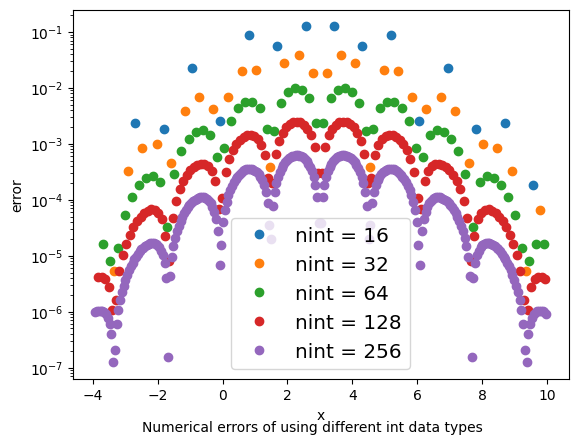

In [3]:
for i in range(0, 5):
    nump = 16 * 2 ** i + 1  
    nint, dh, xx, xx_half = discretisation(x0, xf, nump, dt_float=np.float64)
    err_linf, err_l2, err_arr = deriv_err_tfunc(nm.deriv_fwd, nump, xx, xx_half, False, dt_float=np.float64)
    plt.plot(xx_half[1:nump-1], err_arr[1:nump-1], 'o', label='nint = '+str(nint))

plt.xlabel("x")
plt.ylabel("error")
plt.legend(loc='lower center', shadow=False, fontsize='x-large')
plt.figtext(0.5, 0.0, "Numerical errors of using different int data types", horizontalalignment='center')
plt.semilogy()
plt.show()

2- Test of the quadratic order of the approximation:

We are going to test if the ratio $(h_{i+1}-h_i)/(x_{i+1}-x_i)$ approaches the analytical value of the derivative. To that end, we will use samplings with, successively, 16, 32, 64, 128, 256, 512, 1024 (which are successive powers of 2), and , 1e6 intervals. Calculate the maximum of the absolute value of the error, meaning: the difference between the analytical and the numerical derivatives at the _same points_. Plot a graph of that value versus the size of the interval in each case using a diagram with logarithmic axes. Check if the curve you get corresponds to a quadratic dependence.

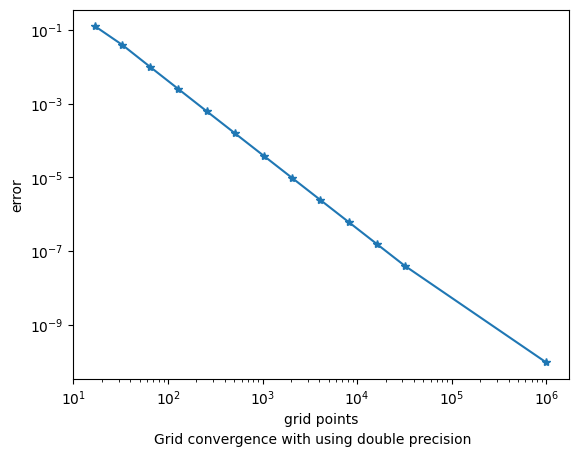

In [4]:
numps = np.array([17, 33, 65, 129, 257, 513, 1025, 2049, 4097, 8193, 16385, 31769, 1000001])
max_errors = np.zeros(numps.size)

for i in range(0, numps.size):
    nump = numps[i]
    nint, dh, xx, xx_half = discretisation(x0, xf, nump, dt_float=np.float64)
    max_errors[i], err_l2, err_arr = deriv_err_tfunc(nm.deriv_fwd, nump, xx, xx_half, False, dt_float=np.float64) 
 
plt.plot(numps, max_errors, '-*')
plt.xlabel("grid points")
plt.ylabel("error")
plt.figtext(0.5, -0.025, "Grid convergence with using double precision", horizontalalignment='center')
plt.loglog()
plt.show()

Try to fit a straight to the logarithm of the error curves using Python program `numpy.polyfit` and `numpy.poly1d`. From the value of the slope you get from that program, check the accuracy with which you obtain the quadratic dependence (only in the region that is linear in the log/log plot).

In [5]:
grid_levels  = np.zeros(numps.size)
error_levels = np.zeros(numps.size) 
for i in range(0, numps.size-1):
    grid_levels[i] = np.log2(numps[i+1] / numps[0])
    error_levels[i] = np.log2(max_errors[i+1] / max_errors[0]) 

coef_convergence = np.polyfit(grid_levels[0:numps.size-2], error_levels[0:numps.size-2], 1)
poly_convergence = np.poly1d(coef_convergence)
print("The function describing the dependence of numerical error reduction on grid point refinement is (in logarithmic scale): ", np.poly1d(coef_convergence))
print("where the first coefficient shows the quadratic dependence of the numerical error on the grid points.")

The function describing the dependence of numerical error reduction on grid point refinement is (in logarithmic scale):   
-2.005 x + 0.2152
where the first coefficient shows the quadratic dependence of the numerical error on the grid points.


What happens with $10^6$ grid points?  

_When using double precision for float point calculations, the round-off error is around $2^{64}\approx 10^{19}$._
_As the numerical error produced with $10^6$ grid points is reaching $10^{-12}$, the round-off error may lead to error that is in the same order of magnetude as the numerical error, after multiplication or division._

What happens if you try for a lower or higher floating number? Numpy uses float 64 as default. Instead, use `np.float32` and `np.float128` (note: `np.float128` sometimes gives an error with `np.roll`!). Explain the error slopes. What is going on with `np.float128`?


_From the results below, one thing that is straightforward to anticipate is that, with `np.float32`, the error starts to  deviate from the designed order of accuracy, when grid points are more than $10^3$. The explanation above can be reused (almost) directly -- simply consider a different level of round-off error. Moreover, we can find a linear dependence of error increase on the grid refinement, which means that error is $O(1/{\Delta x})$. This should be due to the fact that the round-off error to grid resolution ratio is proposional to $1/{\Delta x}$._

_However, using `np.float128` only change the precision of numpy data. Python uses C/C++ functionalities and by default python would use double precision. Therefore, using `np.float128` may not be the solution to further reduce the effects of round-off error._

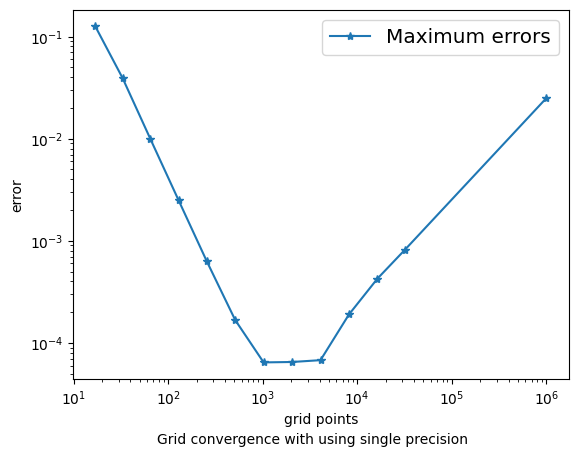

The function describing the dependence of numerical error increase on grid point refinement is (in logarithmic scale):  
1.071 x - 18.89


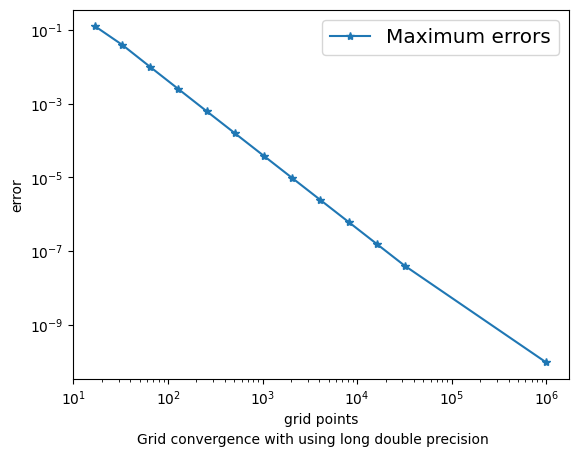

In [6]:
for i in range(0, numps.size):
    nump = numps[i]
    nint, dh, xx, xx_half = discretisation(x0, xf, nump, dt_float=np.float32)
    max_errors[i], err_l2, err_arr = deriv_err_tfunc(nm.deriv_fwd, nump, xx, xx_half, False, dt_float=np.float32)

plt.figure()
plt.plot(numps, max_errors, '-*', label='Maximum errors')
plt.xlabel("grid points")
plt.ylabel("error")
plt.legend(loc='upper right', shadow=False, fontsize='x-large')
plt.figtext(0.5, -0.025, "Grid convergence with using single precision", horizontalalignment='center')
plt.loglog()
plt.show()

# Calculate and show the error increase due to grid refinement
grid_levels = np.zeros(numps.size)
error_levels = np.zeros(numps.size)
for i in range(0, numps.size-1):
    grid_levels[i] = np.log2(numps[i+1] / numps[0])
    error_levels[i] = np.log2(max_errors[i+1] / max_errors[0])

coef_convergence = np.polyfit(grid_levels[8:numps.size-2], error_levels[8:numps.size-2], 1)
poly_convergence = np.poly1d(coef_convergence)
print("The function describing the dependence of numerical error increase on grid point refinement is (in logarithmic scale):", np.poly1d(coef_convergence))

# Calculate and plot errors for long double precision
for i in range(0, numps.size):
    nump = numps[i]
    nint, dh, xx, xx_half = discretisation(x0, xf, nump, dt_float=np.longdouble)
    max_errors[i], err_l2, err_arr = deriv_err_tfunc(nm.deriv_fwd, nump, xx, xx_half, False, dt_float=np.longdouble)

plt.figure()
plt.plot(numps, max_errors, '-*', label='Maximum errors')
plt.xlabel("grid points")
plt.ylabel("error")
plt.legend(loc='upper right', shadow=False, fontsize='x-large')
plt.figtext(0.5, -0.025, "Grid convergence with using long double precision", horizontalalignment='center')
plt.loglog()
plt.show()


3 --

_Known that forward difference is used here to approximate the derivative, we have_
$$\hat{f}'(x_{i+1/2}) = \frac{f(x_{i+1})-f(x_{i})}{\Delta x},$$
_where the overhat $\hat{\cdot}$ indicates that the function or value is a numerical approximation. Then the formula above can be rewritten as below, using the Taylor expansions:_
$$\hat{f}'(x_{i+1/2}) = \frac{1}{2}f'(x_{i+1/2})+h.o.t.,$$
_where $h.o.t.$ is high-order terms led by $f'''(x_{i+1/2})\frac{\Delta x^2}{24}$, as the $\pm f'''(x_{i+1/2})\frac{\Delta x}{8}$ terms are canceled out in the forward difference process. Therefore, when having a constant grid point distance, we can find the quadratic dependence between the error and the grid point numbers._

4 -- 

_The 4th-order difference may reach the same level of error with fewer grid points, compared with the 2nd-order difference scheme, as shown below. Correspondingly, when the numerical error is in the same order of magnitude as the error resulting from round-off error, the total error starts to increase. The increase rate is the same as the 2nd-order difference, i.e., $O(1/{\Delta x})$. This again suggests that the explanation above may be correct, as the increase is irrelevant to the order of accuracy of numerical methods._

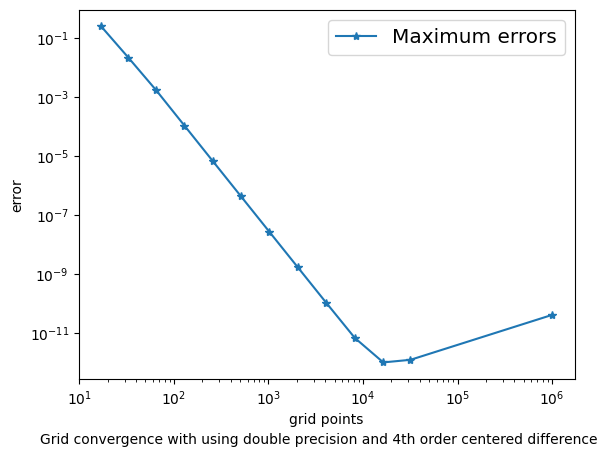

The function describing the dependence of numerical error reduction on grid point refinement is (in logarithmic scale):  
-3.987 x + 0.426
which shows the accuracy of the 4th-order difference.

The function describing the dependence of numerical error increase on grid point refinement is (in logarithmic scale):  
-1.026 x - 16.25
which shows the error caused by the round-off error.


/var/folders/gr/xq17fzkx7k1d04wxvgjh6hc40000gp/T/ipykernel_38725/635339287.py:44: RankWarning: Polyfit may be poorly conditioned
  coef_convergence = np.polyfit(grid_levels[numps.size-2:numps.size-1], error_levels[numps.size-2:numps.size-1], 1)


In [7]:
def deriv_err_tfunc_op(num_deriv_func, nump, xx, dt_float: Type[float]):
    hh = np.zeros(nump, dt_float)
    err_arr = np.zeros(nump, dt_float)
    
    for i in range(0, nump):
        hh[i] = tfunc(xx[i])

    err_linf = 0.0
    err_l2   = 0.0
    
    hp_analytical = np.zeros(nump, dt_float) 
    hp_numerical  = num_deriv_func(xx, hh, dtype=dt_float)
    for i in range(2, nump - 3):
        hp_analytical[i] = analyt_deriv_tfunc(xx[i], dt_float=dt_float)  
        err_linf = max(err_linf, abs(hp_numerical[i] - hp_analytical[i]))
        err_l2   = err_l2 + ((hp_numerical[i] - hp_analytical[i]) / dt_float(nump - 1)) ** 2.0
        err_arr[i] = abs(hp_numerical[i] - hp_analytical[i])  
 
    err_l2   = math.sqrt(err_l2) 
    return err_linf, err_l2, err_arr

for i in range(0, numps.size):
    nump = numps[i] 
    nint, dh, xx, xx_half = discretisation(x0, xf, nump, dt_float=np.longdouble)
    max_errors[i], err_l2, err_arr = deriv_err_tfunc_op(nm.deriv_4tho, nump, xx, dt_float=np.double)

plt.figure()
plt.plot(numps, max_errors, '-*', label='Maximum errors')
plt.xlabel("grid points")
plt.ylabel("error")
plt.legend(loc='upper right', shadow=False, fontsize='x-large')
plt.figtext(0.5, -0.025, "Grid convergence with using double precision and 4th order centered difference", horizontalalignment='center')
plt.loglog()
plt.show()

for i in range(0, numps.size-1):
    grid_levels[i] = np.log2(numps[i+1] / numps[0])
    error_levels[i] = np.log2(max_errors[i+1] / max_errors[0])

coef_convergence = np.polyfit(grid_levels[0:numps.size-4], error_levels[0:numps.size-4], 1)
poly_convergence = np.poly1d(coef_convergence)
print("The function describing the dependence of numerical error reduction on grid point refinement is (in logarithmic scale):", np.poly1d(coef_convergence))
print("which shows the accuracy of the 4th-order difference.\n")
coef_convergence = np.polyfit(grid_levels[numps.size-2:numps.size-1], error_levels[numps.size-2:numps.size-1], 1)
poly_convergence = np.poly1d(coef_convergence)
print("The function describing the dependence of numerical error increase on grid point refinement is (in logarithmic scale):", np.poly1d(coef_convergence))
print("which shows the error caused by the round-off error.")

In [8]:
# Below is the code for testing ex_1, using the same test function above.
nump1 = 65
nump2 = 129
nump4 = 257
nint1, dh1, xx1, xx_half1 = discretisation(x0, xf, nump1, dt_float=np.float64)
nint2, dh2, xx2, xx_half2 = discretisation(x0, xf, nump2, dt_float=np.float64)
nint4, dh4, xx4, xx_half4 = discretisation(x0, xf, nump4, dt_float=np.float64)

print("For the given problem:")
hh1 = np.zeros(nump1, np.float64) 
for i in range(0, nump1):
    hh1[i] = tfunc(xx1[i])
hh_numerical1 = nm.deriv_cent(xx1, hh1, dtype=np.float64)
hh2 = np.zeros(nump2, np.float64) 
for i in range(0, nump2):
    hh2[i] = tfunc(xx2[i])
hh_numerical2 = nm.deriv_cent(xx2, hh2, dtype=np.float64)
hh4 = np.zeros(nump4, np.float64) 
for i in range(0, nump4):
    hh4[i] = tfunc(xx4[i])
hh_numerical4 = nm.deriv_cent(xx4, hh4, dtype=np.float64)
print("the order of accuracy of the 2nd-order centered difference method is", nm.order_conv(hh_numerical1, hh_numerical2, hh_numerical4))
 
hh_numerical1 = nm.deriv_4tho(xx1, hh1, dtype=np.float64) 
hh_numerical2 = nm.deriv_4tho(xx2, hh2, dtype=np.float64) 
hh_numerical4 = nm.deriv_4tho(xx4, hh4, dtype=np.float64) 
print("the order of accuracy of the 4th-order centered difference method is", nm.order_conv(hh_numerical1, hh_numerical2, hh_numerical4))


For the given problem:
the order of accuracy of the 2nd-order centered difference method is 2.0046937146044357
the order of accuracy of the 4th-order centered difference method is 3.9914160611326697
